<a href="https://colab.research.google.com/github/Eric-lin24/Team-5/blob/main/Denoiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing requirements on collab
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing necessary packages for audio processing etc.
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

In [ ]:
# loading test data:
# url = "https://drive.google.com/file/d/1BChy8FL3x_NUPU16D1tRtQcg15rd2pF2/view?usp=sharing"
# url = "https://github.com/Eric-lin24/Team-5/blob/aac6b43b611b19ea5d77d72348b73ac6cb77057f/assets_fish.wav"
url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav" # the og sample
response = urllib.request.urlopen(url)
# print(type(response.read()))
data, rate = sf.read(io.BytesIO(response.read()))
data = data

In [ ]:
# Audio clip (before noise):
IPython.display.Audio(data=data, rate=rate)

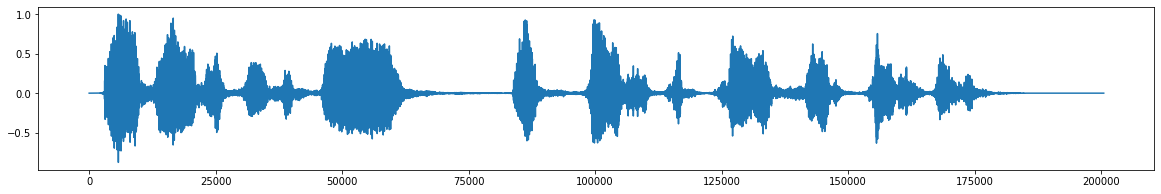

In [ ]:
# Plotting waveform before noise:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

**Adding Noise:**

In [ ]:
# Adding noise:
noise_len = 2 # length in seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

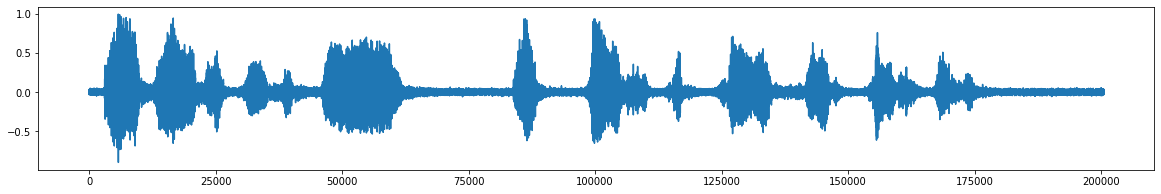

In [ ]:
# Plotting waveform after noise:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [ ]:
# Audio clip (after noise):
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

**Stationary Noise reduction:**

In [ ]:
# Stationary noise-reduction:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.5,stationary=True)

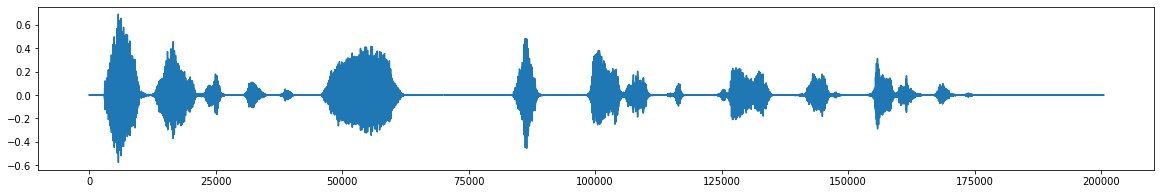

In [ ]:
# Plotting waveform after stationary noise reduction:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [ ]:
# Audio clip (after stationary noise-reduction)
IPython.display.Audio(data=reduced_noise, rate=rate)

**Non-Stationary Noise reduction:**

In [ ]:
# Non-stationary noise-reduction:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, thresh_n_mult_nonstationary=2,stationary=False)

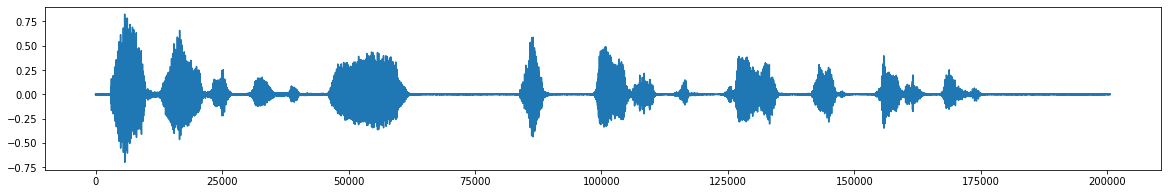

In [ ]:
# Plotting waveform after non-stationary noise reduction:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [ ]:
# Audio clip (after non-stationary noise-reduction)
IPython.display.Audio(data=reduced_noise, rate=rate)

In [ ]:
! pip install torch
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import librosa
import numpy as np
import soundfile as sf
from scipy.io import wavfile
from IPython.display import Audio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer

In [ ]:
def read_audio_file():
    with wave.open(filename, 'rb') as w:
        rate = w.getframerate()
        frames = w.getnframes()
        buffer = w.readframes(frames)

    return buffer, rate